# Tutorial 1: Damped pendulum
## Input/Output and regression

This problem consists of studying damped oscillations. Remember that the 2nd-order ODE describing damped oscillations is:

$$m\,\frac{d^2y}{dt^2}+b\,\frac{dy}{dt}+k\,y = 0,$$

where $m=1\,\rm kg$ is the oscillator mass, $b$ is the damping coefficient, and $k$ is the force constant of the oscillator. The analytical solution to the above ODE, known as the the damped oscillation equation, reads:

$$\boxed{y(t)=A\,e^{-\beta\,t}\,\cos{(\omega\,t)}},$$ 

where $A$ is  the inital oscillation amplitude, $\beta=b/2m$ is the damping ratio, and $\omega$ is the angular frequency of the oscillations given by:

$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}}.$$

The data file given below contains a time series obtained from a damped harmonic oscillator experiment. The first column of the file has times in seconds $\rm [s]$ and the second column has the displacements in meters $\rm [m]$. It can be found at:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/damped_pendulum.csv

##### Data reference: https://www.kaggle.com/datasets/cici118/damped-harmonic-oscillator


### Activities to do: 

a) Create a python I/O function that opens the data file and returns $2$ arrays, one for times and one for displacements.

b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

c) Use a physically-motivated model (i.e. the damped oscillation equation), and constrain its free parameters by carrying out a regression.

d) Report the results from your regression, i.e. the best-fit values for the free parametes with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

- The initial amplitude, $A$, of the oscillations.
- The damping ratio, $\beta$.
- The angular frequency, $\omega$, of the damped pendulum.
- The damping coefficient, $b$.
- The force constant of the oscillator, $k$.

e) Make a plot showing the empirical data and the best-fit model obtained from your regression.

### a) Create a python I/O function that opens the data file and returns $2$ arrays, one for times and one for displacements.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Inspection of the data

In [2]:
# Provide the path
path = './Data/damped_pendulum.csv'

# Get it!
pendulum_dataset = pd.read_csv(path)

# Print
print(pendulum_dataset)

           time  displacement
0      0.000000  1.000000e+00
1      1.003345  5.523100e-01
2      2.006689 -3.387563e-01
3      3.010034 -8.466000e-01
4      4.013378 -5.608279e-01
..          ...           ...
195  195.652160  4.728779e-05
196  196.655520 -5.399856e-07
197  197.658860 -4.332556e-05
198  198.662200 -4.389308e-05
199  199.665540 -5.773922e-06

[200 rows x 2 columns]


#### Solving it without a function

In [3]:
# Get the arrays
time_array = np.array(pendulum_dataset.iloc[:,0])
disp_array = np.array(pendulum_dataset['displacement'])

The problem has been solved, but not using a function. Let's combine this process into a function!

#### Function

In [4]:
def io_function(filename, boolean):
    """
    Description of the function.
    Inputs: filename (string) -> path to the file
            number_1 (float) -> number 
    Outputs: time (array, float) -> time array
             displacements (array, float) -> displacements
    """
    # Read the file:
    df = pd.read_csv(filename, sep = ',')

    # Get data into arrays:
    time = np.array(df['time'])
    displacements = np.array(df['displacement'])

    # Plot (put here after doing the plot outside)
    fig_1 = plt.figure(figsize=(10,4))

    plt.scatter(time, displacements, marker = '.', color = 'k')
    
    plt.title('Damped pendulum data')
    plt.xlabel('Time [s]')
    plt.ylabel('Displacements [m]')
    
    plt.grid(linestyle = '-.')

    if boolean:
        plt.show()
    plt.close()

    return time, displacements, fig_1

### b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

In [5]:
# Use the function
time_array, disp_array, figure_1 = io_function(path, False)

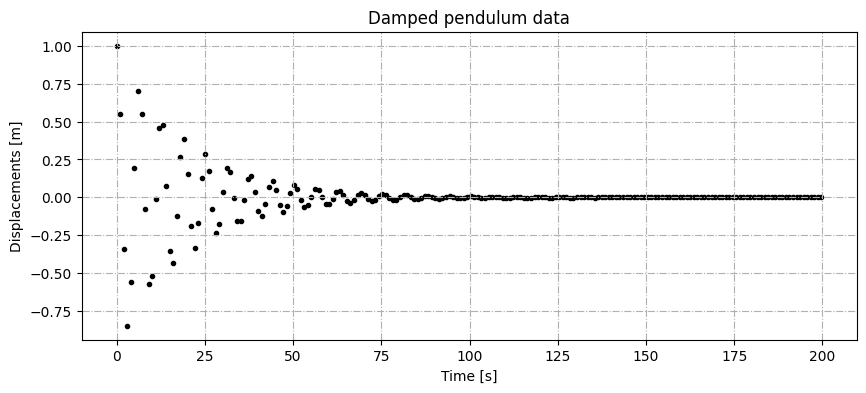

In [6]:
figure_1

In [7]:
# Cheking the shapes
print(time_array.shape, disp_array.shape)

(200,) (200,)


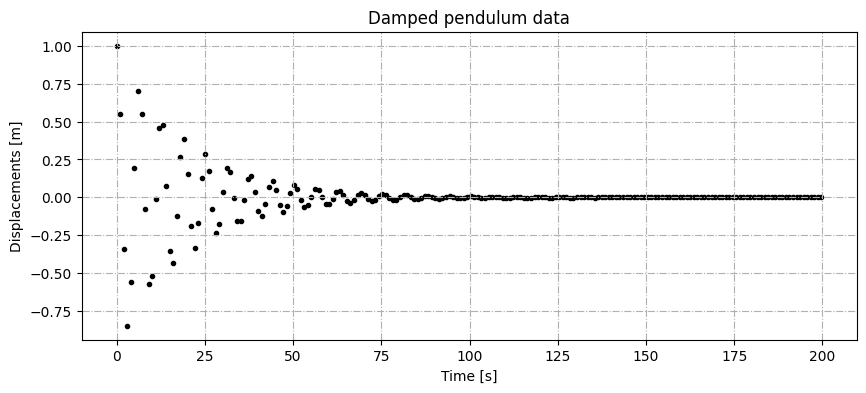

In [8]:
# Plotting
plt.figure(figsize=(10,4))

plt.scatter(time_array, disp_array, marker = '.', color = 'k')

plt.title('Damped pendulum data')
plt.xlabel('Time [s]')
plt.ylabel('Displacements [m]')

plt.grid(linestyle = '-.')

#plt.xlim(0, 6*np.pi)
plt.show()
plt.close()

### c) Use a physically-motivated model, and constrain its free parameters by carrying out a regression.

The model we're going to use is
$$ y(t)= A e^{-\beta\,t}\,\cos(\omega\,t). $$

In [9]:
# Model
def physical_model(times, A, beta, omega):
    """
    Model to use for the regression. 
    """
    return A*np.exp(-beta*times)*np.cos(omega*times)

In [10]:
# Import the library
import scipy.optimize as opt

In [11]:
# Call the curve_fit() function
coef, cova = opt.curve_fit(physical_model, time_array, disp_array)

# See the coefficients and the matrix
print(coef)
print(cova)

[1.0031306  0.05012387 0.9962379 ]
[[1.03070555e-05 5.12763534e-07 1.76549028e-10]
 [5.12763534e-07 5.68731478e-08 1.23397638e-11]
 [1.76549028e-10 1.23397638e-11 3.13625400e-08]]


In [12]:
# Get the regression curve:
fit_array = physical_model(time_array, *coef)

### d) Report the results from your regression, i.e. the best-fit values for the free parametes with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

- The initial amplitude, $A$, of the oscillations.
- The damping ratio, $\beta$.
- The angular frequency, $\omega$, of the damped pendulum.
- The damping coefficient, $b$.
- The force constant of the oscillator, $k$.

In [13]:
# Function
def reporting(coef, cova, coef_name):
    """
    """
    # Uncertainties
    uncertainties = np.sqrt(np.diag(cova))

    # Run this loop
    for i in range(len(coef)):
        print(f'{coef_name[i]:.6} = {coef[i]:.6} +/- {uncertainties[i]:.6}')

    return uncertainties

In [14]:
# Define the names
coef_names = ['A', 'beta', 'omega']

# Call the function
uncertainties_array = reporting(coef, cova, coef_names)

A = 1.00313 +/- 0.00321046
beta = 0.0501239 +/- 0.000238481
omega = 0.996238 +/- 0.000177095


In [15]:
# Since beta = b/2m and m = 1kg,
beta = coef[1]
omega = coef[2]

# and simply
b = beta*2
b_delta = uncertainties_array[1]*2

print(f'b = {b} +/- {b_delta}.')

b = 0.10024773519459568 +/- 0.0004769618342400325.


While $k$ should be given by
$$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}} \implies k = m\left(\omega² + \frac{b²}{4m²}\right),$$

and it's uncertainty by using propagation can be obtained with
$$ \Delta_{k} = 2 \sqrt{\omega²\,\Delta_{\omega}²+b²\,\Delta_b²}.$$

In [16]:
# So that
k = omega**2+b**2/4

# Uncertainty in k
k_delta = 2*np.sqrt(omega**2*uncertainties_array[-1]**2+b**2*b_delta**2)

print(f'k = {k} +/- {k_delta}.')

k = 0.9950023599964671 +/- 0.00036558565329013404.


### e) Make a plot showing the empirical data and the best-fit model obtained from your regression.

In [17]:
# Increase the resolution
new_time_array = np.linspace(time_array[0], time_array[-1], 2000)

# Call the function (the input does not have to be the original time array)
new_fit_array = physical_model(new_time_array, *coef)

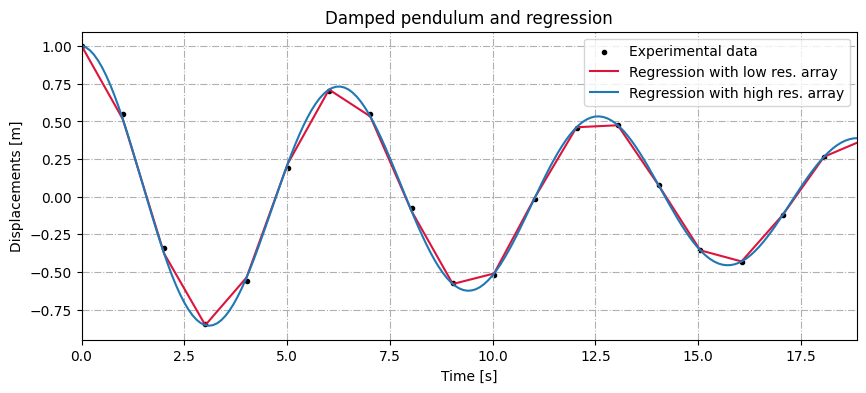

In [18]:
# Plotting:
plt.figure(figsize = (10,4))

plt.scatter(time_array, disp_array, marker = '.', label = 'Experimental data', color = 'k')
plt.plot(time_array, fit_array, color = 'crimson', label = 'Regression with low res. array')
plt.plot(new_time_array, new_fit_array, color = 'C10',  label = 'Regression with high res. array')

plt.title('Damped pendulum and regression')
plt.xlabel('Time [s]')
plt.ylabel('Displacements [m]')

plt.grid(linestyle = '-.')
plt.legend()

plt.xlim(0,6*np.pi)
plt.show()
plt.close()

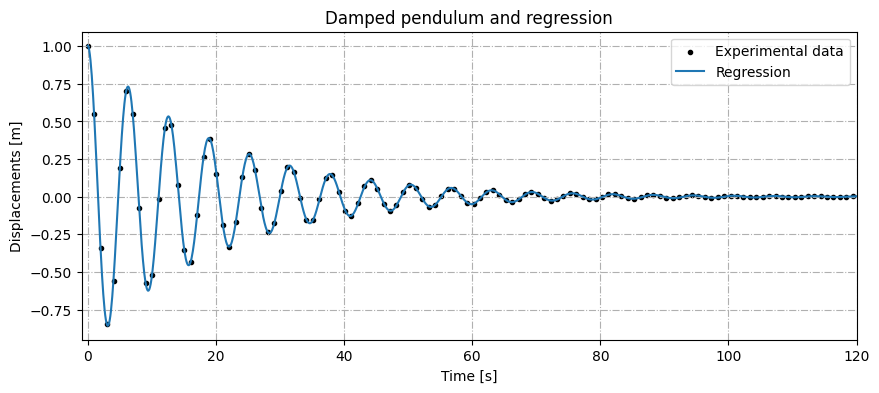

In [19]:
# Plotting:
plt.figure(figsize = (10,4))

plt.scatter(time_array, disp_array, marker = '.', label = 'Experimental data', color = 'k')
plt.plot(new_time_array, new_fit_array, label = 'Regression', color = 'C10')

plt.title('Damped pendulum and regression')
plt.xlabel('Time [s]')
plt.ylabel('Displacements [m]')

plt.grid(linestyle = '-.')
plt.legend()

plt.xlim(-1, 120)
plt.show()
plt.close()